# Análisis del dataset Telco Customer Churn
## Datos para fidelización de clientes de una empresa de telecomunicaciones.
#### Dataset WA_Fn-UseC_-Telco-Customer-Churn 
#### Obtenido de: https://www.kaggle.com/blastchar/telco-customer-churn


#### Laura Cristina López Bedoya

In [1]:
# Importar librerias para la preparación y visualización de los datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Leer el dataset
datos = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
datos.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Información del dataset
#### En este dataset, los datos sin procesar contienen 7043 filas (clientes) y 21 columnas (características). La idea es identificar si un cliente se retirará de la compañia, la columna "Churn" es el objetivo.

- Información del cliente: 
    - Identificación del cliente (customerID): Código de identificación
    - Genero (gender): Male, Female
    - Jubilado (SeniorCitizen): 1, 0
    - Tienen socios (Partner): Yes, No
    - Dependientes (Dependents): Yes, No
    
    
- Información de la cuenta del cliente: 
    - Cuánto tiempo ha sido cliente (tenure): Número de meses que el cliente ha estado en la compañía
    - Contrato (Contract): Month-to-month, One year, Two year
    - Facturación electrónica (PaperlessBilling): Yes, No
    - Método de pago (PaymentMethod):Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
    - Cargos mensuales (MonthlyCharges).
    - Cargos totales (TotalCharges).
    
    
- Servicios a los que se ha suscrito cada cliente: 
    - Telefonía (PhoneService): Yes, No
    - Multiples lineas (MultipleLines): Yes, No, No phone service
    - Internet (InternetService): DSL, Fiber optic, No
    - Seguridad en línea (OnlineSecurity): Yes, No, No internet service
    - Respaldo en línea (OnlineBackup): Yes, No, No internet service
    - Protección del dispositivo (DeviceProtection): Yes, No, No internet service
    - Soporte técnico (TechSupport): Yes, No, No internet service
    - Transmisión de TV (StreamingTV): Yes, No, No internet service
    - Transmisión de películas (StreamingMovies): Yes, No, No internet service 
    
    
#### DATO DE SALIDA:
- El cliente permaneció o abandonó la compañía (Churn): Yes, No

In [3]:
#Nombres de las columnas del dataset.
datos.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Descripción de datos

In [4]:
#Número de filas y columnas del dataset.
datos.shape 

(7043, 21)

In [5]:
#No hay datos faltantes en el dataset
datos.dropna().shape 

(7043, 21)

In [6]:
#Las columnas no tienen datos nulos.
datos.isnull().any(axis=0).value_counts() 

False    21
dtype: int64

In [7]:
#Confirmamos que las columnas no tienen datos nulos.
datos.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Conocer de que tipo son las variables. Variables object son categóricas, variables int64 y float64 son numéricas.
datos.dtypes 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Información general de los datos de cada columna
datos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [10]:
#Descripción de los datos numéricos del dataset.
datos.describe() 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- En la descripción de los datos numéricos de dataset se detecta lo siguiente:
  - Los valores de SeniorCitizen son 0 y 1. El 75% de los datos tienen valor 0
  - Los valores de tenure se encuentran entre 0.000000 y 72.000000. Para esta columna 0 puede significar que es un cliente nuevo
  - Los valores de MonthlyCharges varian entre 18.250000 y 118.750000

In [11]:
#Descripción de los datos incluyendo categóricos 
datos.describe(include="object") 

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7880-XSOJX,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


- En la descripción de los datos numéricos de dataset se detecta lo siguiente:
  - Los valores de customerID son unicos, cada cliente es diferente y cuenta con un unico identificador.
  - Los valores de gender son 2, Male y Female. La mayoria de clientes son Hombres.
  - La mayoria de los clientes no tienen socios, ni dependencia, adquieren servicio de telefonía, sin multiples lineas, con tecnologia Fibra optica, no incluyen Seguridad, respaldo, protección al dispositivo, soporte técnico, StreamingTV y StreamingMovies; el contrato que adquiere la mayoria de los clientes es mes a mes con facturación electronica.
  - La variable de interes Churn nos indica que el 26,54% de los clientes se retiran de la compañia. 

In [12]:
#Cantidad por cada valor que puede tomar una variable en una columna del dataset:
name_col = list(datos.columns)

for i in name_col:
    if i not in ('customerID','tenure','MonthlyCharges','TotalCharges'):
        print('\n {0}: \n {1}'.format(i,datos[i].value_counts()))


 gender: 
 Male      3555
Female    3488
Name: gender, dtype: int64

 SeniorCitizen: 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64

 Partner: 
 No     3641
Yes    3402
Name: Partner, dtype: int64

 Dependents: 
 No     4933
Yes    2110
Name: Dependents, dtype: int64

 PhoneService: 
 Yes    6361
No      682
Name: PhoneService, dtype: int64

 MultipleLines: 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

 InternetService: 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

 OnlineSecurity: 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

 OnlineBackup: 
 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

 DeviceProtection: 
 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection

In [13]:
#El dataset no tiene datos duplicados
datos[datos.duplicated()] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [14]:
#Convertir de categórica a numérica las columnas que tienen dos valores. 1 si cumple la condicion y es 0 si no la cumple.
#Esto se hace con el fin de poner las variables en un lenguaje que la máquina pueda entender para luego aplicar algoritmos.
df = pd.get_dummies(datos, columns = ["gender","Partner","Dependents","PhoneService","PaperlessBilling","Churn"], drop_first = True) #Se guarda en una unica columna
df = pd.get_dummies(df, columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']) #Crea una columna por cada valor

#Convertir variable categorica a numérica
df["TotalCharges"] = df["TotalCharges"].convert_objects(convert_numeric=True)

df.head()

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


,customerID,SeniorCitizen,tenure,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,1,Electronic check,29.85,29.85,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,34,Mailed check,56.95,1889.50,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,3668-QPYBK,0,2,Mailed check,53.85,108.15,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,0,45,Bank transfer (automatic),42.30,1840.75,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
4,9237-HQITU,0,2,Electronic check,70.70,151.65,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [15]:
#Correlación de variables numéricas
#No hay una correlación significativa entre variables. 
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,-0.001874,0.016479,-0.211185,0.008576,0.156530,0.150889,...,-0.060625,0.049062,-0.182742,0.105378,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000
tenure,0.016567,1.000000,0.247900,0.825880,0.005106,0.379697,0.159712,0.008448,0.006152,-0.352229,...,0.324221,-0.245039,-0.039062,0.279756,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,-0.014569,0.096848,-0.113890,0.247398,0.352150,0.193356,...,0.338304,0.016951,-0.763557,0.629603,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,0.157830,-0.199484,...,0.432868,-0.197144,-0.374878,0.515709,-0.202605,-0.374878,0.519867,-0.446776,0.170569,0.358036
gender_Male,-0.001874,0.005106,-0.014569,0.000048,1.000000,-0.001808,0.010517,-0.006488,-0.011754,-0.008612,...,-0.009212,0.003267,0.006026,-0.008393,0.005374,0.006026,-0.010487,-0.003386,0.008026,-0.003695
Partner_Yes,0.016479,0.379697,0.096848,0.319072,-0.001808,1.000000,0.452676,0.017706,-0.014877,-0.150448,...,0.119999,-0.124357,0.000615,0.124666,-0.117529,0.000615,0.117412,-0.280865,0.082783,0.248091
Dependents_Yes,-0.211185,0.159712,-0.113890,0.064653,0.010517,0.452676,1.000000,-0.001762,-0.111377,-0.164221,...,0.063268,-0.101176,0.139812,-0.016558,-0.078198,0.139812,-0.039741,-0.231720,0.068368,0.204613
PhoneService_Yes,0.008576,0.008448,0.247398,0.113008,-0.006488,0.017706,-0.001762,1.000000,0.016505,0.011942,...,-0.096340,-0.122455,0.172209,-0.022574,-0.112254,0.172209,-0.032959,-0.000742,-0.002791,0.003519
PaperlessBilling_Yes,0.156530,0.006152,0.352150,0.157830,-0.011754,-0.014877,-0.111377,0.016505,1.000000,0.191825,...,0.037880,0.047712,-0.321013,0.223841,0.059488,-0.321013,0.211716,0.169096,-0.051391,-0.147889
Churn_Yes,0.150889,-0.352229,0.193356,-0.199484,-0.008612,-0.150448,-0.164221,0.011942,0.191825,1.000000,...,-0.164674,0.128916,-0.227890,0.063228,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253


## Visualización de datos

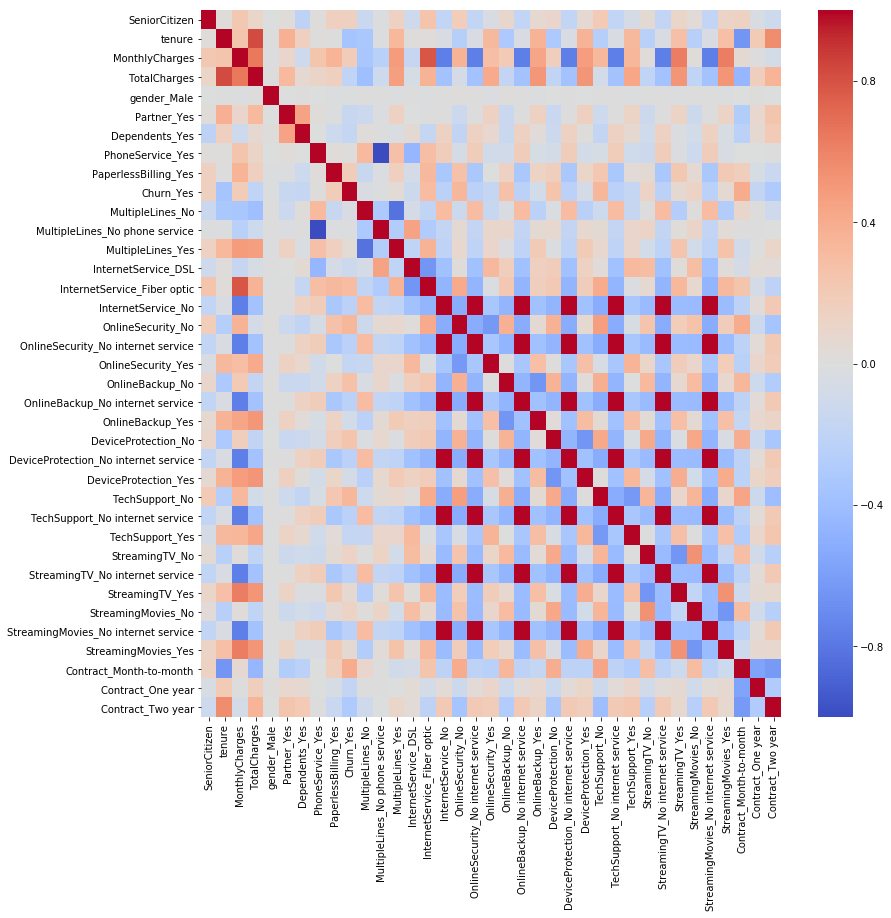

In [16]:
#Gráfica de correlación de las variables del dataset. La correlación es mayor cuando el color se torna rojo.
plt.figure(figsize=(13,13)) 
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

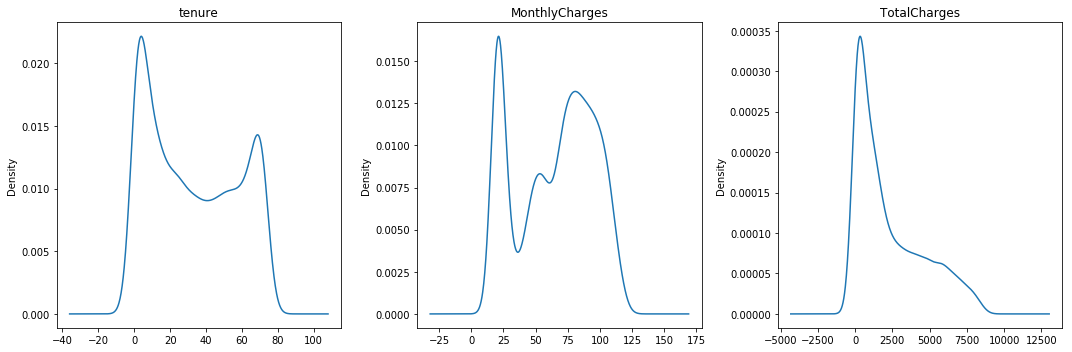

In [17]:
#Visualización de variables numéricas
ax = 131

plt.figure(figsize=(15,5))

variablesNum = ['tenure','MonthlyCharges','TotalCharges']

for i in variablesNum:
    plt.subplot(ax)
    df[i].plot.kde()
    plt.title(i)
    ax += 1

plt.tight_layout()

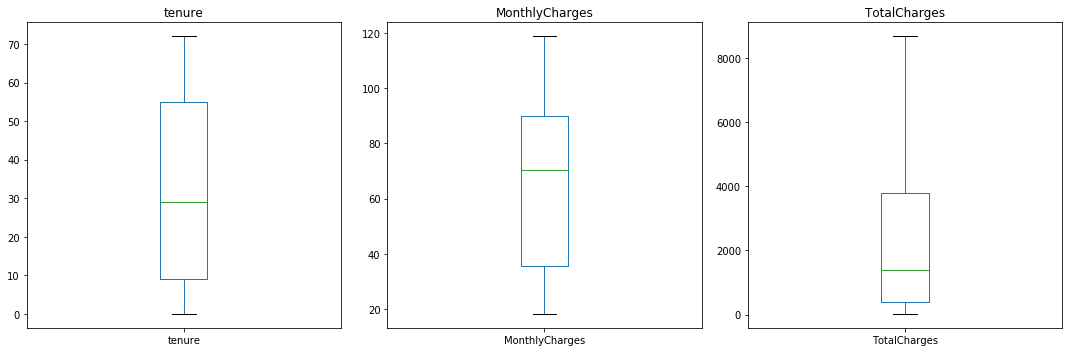

In [18]:
ax = 131

plt.figure(figsize=(15,5))

variablesNum = ['tenure','MonthlyCharges','TotalCharges']

for i in variablesNum:
    plt.subplot(ax)
    df[i].plot.box() 
    plt.title(i)
    ax += 1

plt.tight_layout()

- Cerca del 50% de los clientes lleva poco tiempo en la compañía.
- Pocos clientes tienen entre 55 y 70 meses en la compañia.
- Los cargos por mes en promedio son altos
- La mayoria de los cargos totales se encuentran en un rango medio-bajo

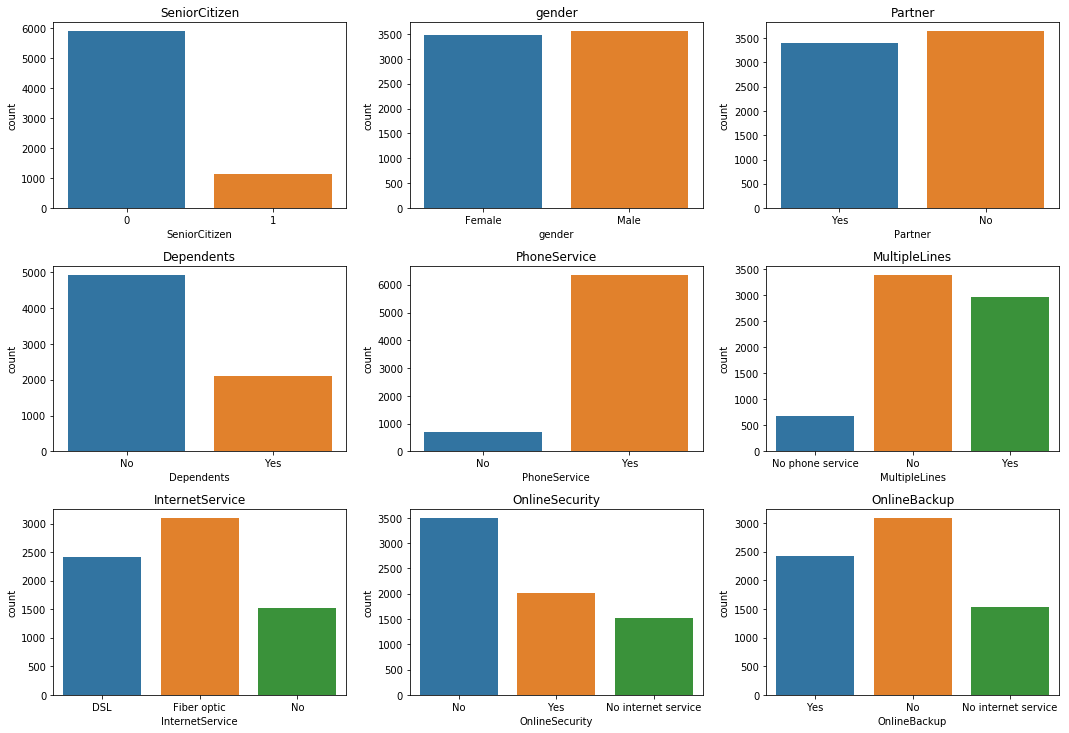

In [19]:
plt.figure(figsize=(15,20))

ax2 = 631

variablesCat = ['SeniorCitizen','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup']

for i in variablesCat:
    plt.subplot(ax2)
    sns.countplot(x=i,data=datos) 
    plt.title(i)
    ax2 += 1

plt.tight_layout()

- La mayoría de los clientes no son jubilados.
- Hay una cantidad similar de hombres y mujeres.
- Aproximadamente la mitad de los clientes tienen socios.
- La cantidad de clientes que no tienen dependencias duplica la cantidad de los que si la tienen.
- La mayoría de los clientes tienen servicio de telefonía.
- La cantidad de clientes que tienen multiples lineas es similar a los que n.
- La mayoría de los clientes tienen servicio de internet por Fibra óptica.
- La mayoría de los clientes no tiene servicio de seguridad y respaldo en línea.

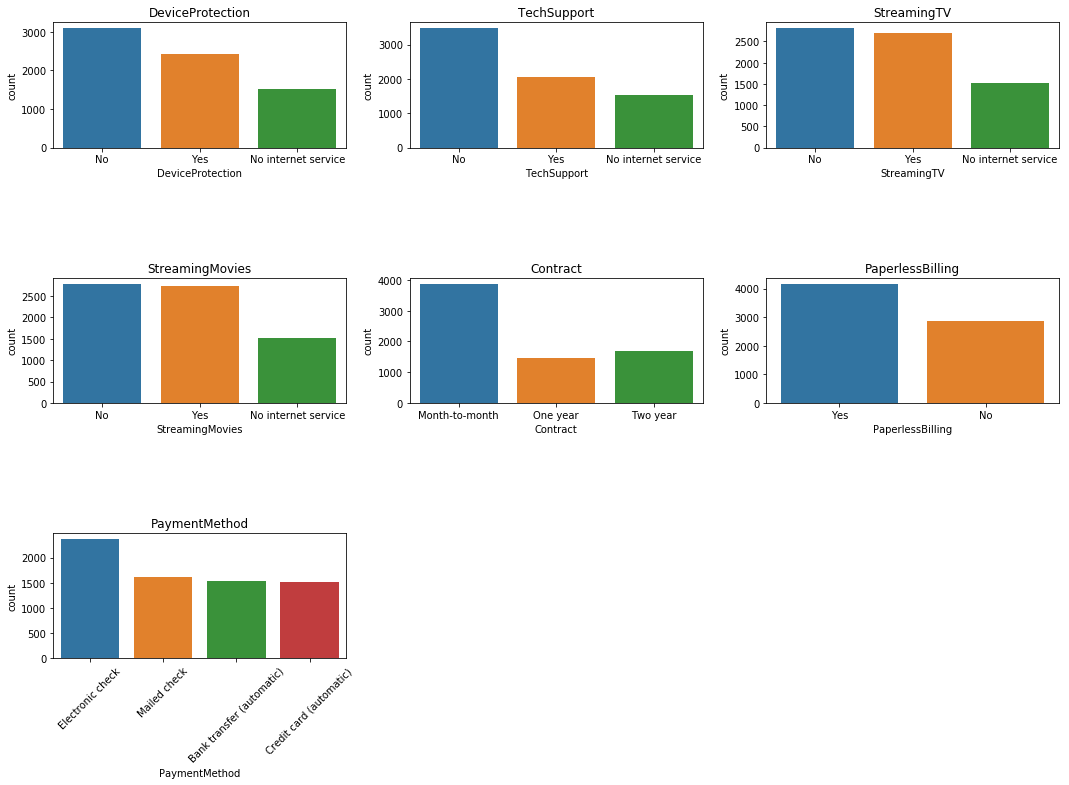

In [20]:
plt.figure(figsize=(15,20))

ax3 = 631

variablesCat2 = ['DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

for i in variablesCat2:
    plt.subplot(ax3)
    sns.countplot(x=i, data=datos) 
    plt.title(i)
    ax3 += 1

plt.xticks(rotation=45)
plt.tight_layout()


- La mayoría de los clientes no protegen sus dispositivos.
- La mayoría de los clientes no tienen soporte técnico.
- La cantidad de clientes con servicio StreamingTV es similar a la cantidad de clientes que no lo tienen.
- La cantidad de clientes con servicio StreamingMovies es similar a la cantidad de clientes que no lo tienen.
- La mayoría de los clientes tiene contrato mes a mes.
- Los clientes prefieren facturación electrónica y la opción Electronic check.

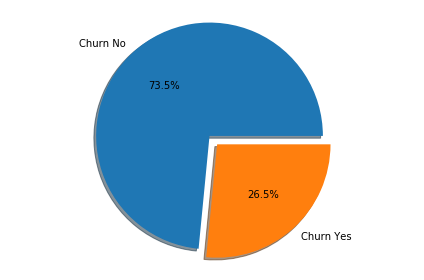

In [21]:
fig1, ax1 = plt.subplots()

labels = 'Churn No', 'Churn Yes'
sizes = df["Churn_Yes"].value_counts()
explode = (0, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')
plt.tight_layout()

- El 26.5% de los clientes se han retirado se la compañía

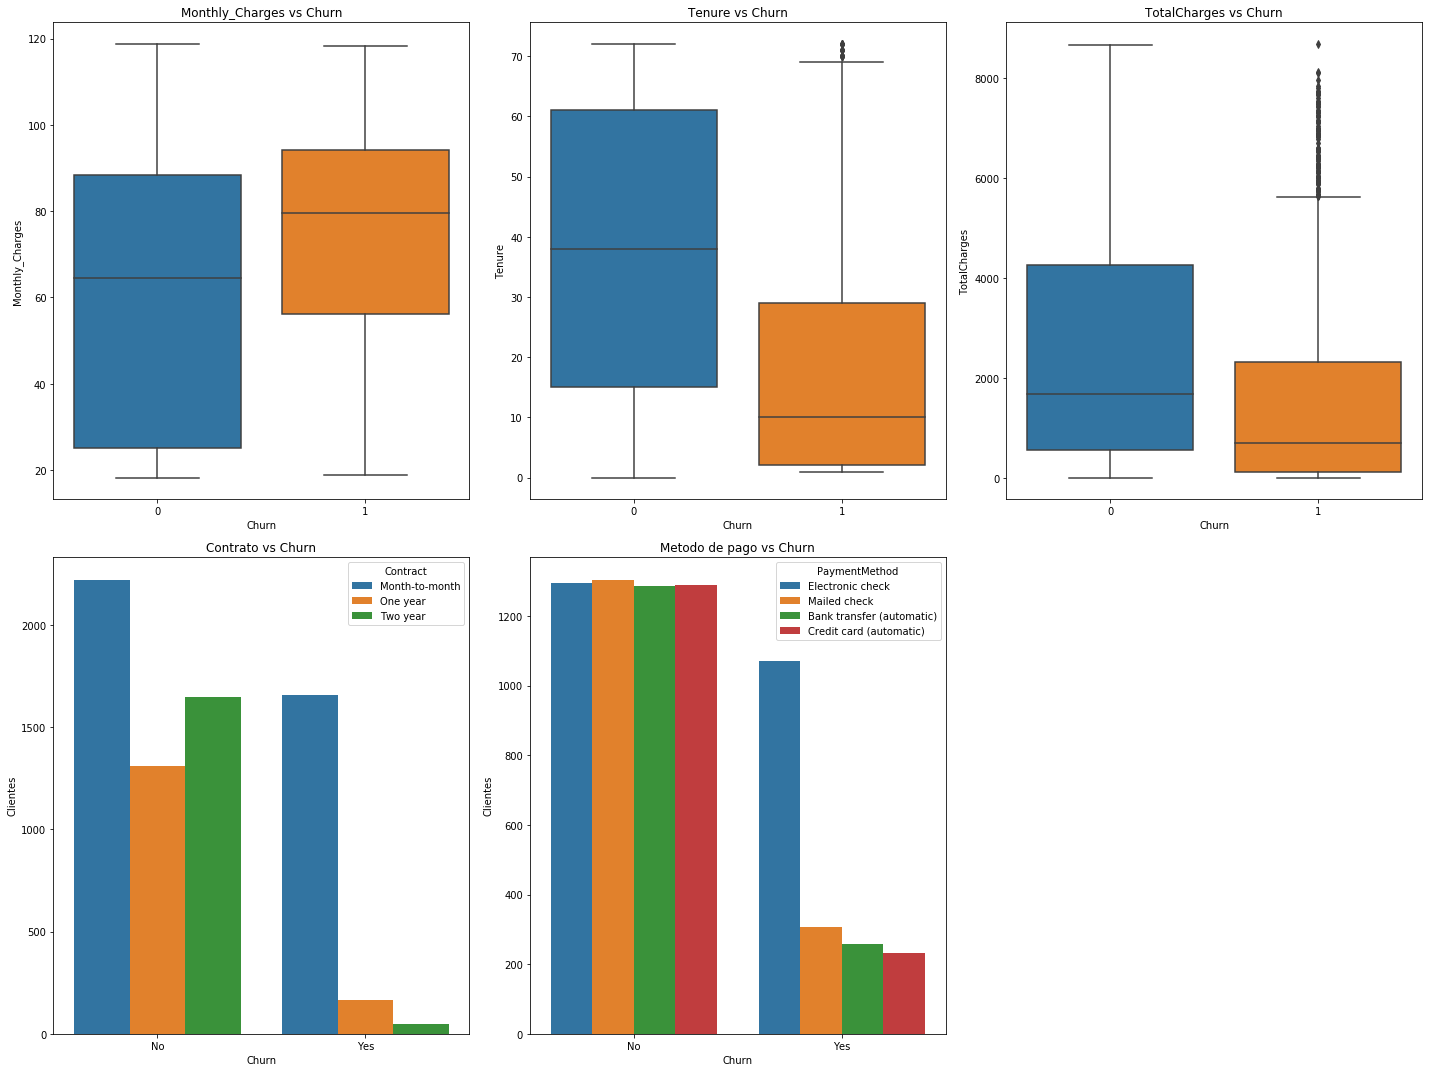

In [22]:
plt.figure(figsize=(20,15))

#Cargo mensual vs decisión del cliente acerca de retirarse
plt.subplot(231)
ax = sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=df)
ax.set_title('Monthly_Charges vs Churn') 
ax.set_ylabel('Monthly_Charges') 
ax.set_xlabel('Churn')

#Tiempo en la compañía vs decisión del cliente acerca de retirarse
plt.subplot(232)
ax = sns.boxplot(x='Churn_Yes', y='tenure', data=df)
ax.set_title('Tenure vs Churn') 
ax.set_ylabel('Tenure')
ax.set_xlabel('Churn')

#Cargo total vs decisión del cliente acerca de retirarse
plt.subplot(233)
ax = sns.boxplot(x='Churn_Yes', y='TotalCharges', data=df)
ax.set_title('TotalCharges vs Churn')  
ax.set_ylabel('TotalCharges')
ax.set_xlabel('Churn')

#Tipo de contrato vs decisión del cliente acerca de retirarse
plt.subplot(234)
ax = sns.countplot(x="Churn", hue="Contract", data=datos);
ax.set_title('Contrato vs Churn')  
ax.set_ylabel('Clientes')
ax.set_xlabel('Churn')

#Metodo de pago vs decisión del cliente acerca de retirarse
plt.subplot(235)
ax = sns.countplot(x="Churn", hue="PaymentMethod", data=datos);
ax.set_title('Metodo de pago vs Churn')  
ax.set_ylabel('Clientes')
ax.set_xlabel('Churn')

plt.tight_layout()

## Conclusiones


- Las variables del dataset no tienen una correlación muy significativa (>0.7) con la variable objetivo (Churn).
- La mayoría de los clientes tiene poco tiempo con la compañía.
- Los cargos mensuales son altos.
- Como características generales de los clientes: No son jubilados, cantidad similar de hombres y mujeres, adquieren servicio de telefonía, la tecnología más usada para el servicio de internet es Fibra óptica, no adquieren muchos servicios online como seguridad, respaldo y soporte, prfieren facturación electrónica como método de pago Electronic check y tienen un contrato mes a mes.
- Los clientes deciden retirarse cuando los cargos mensuales son muy altos, llevan poco tiempo de adquirir servicios con la compañía y tienen un contrato mes a mes.

### Recomendaciones

- Realizar campañas de publicidad para atraer clientes cuyos ingresos sean medio-bajo.
- Estructurar un programa de fidelización con descuentos mensuales.